In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

In [78]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

In [79]:
# Clean data
"""
df_percent_two_half = df["value"].sort_values(ascending=False).iloc[32 : ]
df_percent_two_half = pd.DataFrame(df_percent_two_half)
len(df)
1304 * 0.025
"""

df = df
[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]


[date
 2016-05-09    False
 2016-05-10    False
 2016-05-11    False
 2016-05-12    False
 2016-05-13    False
               ...  
 2019-11-29     True
 2019-11-30     True
 2019-12-01     True
 2019-12-02    False
 2019-12-03     True
 Name: value, Length: 1304, dtype: bool]

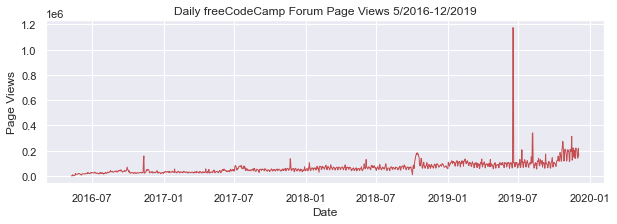

In [80]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(df.index, df["value"],"r", linewidth=1)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    
    #ax.margins(x=0, y=-0.25)


draw_line_plot()

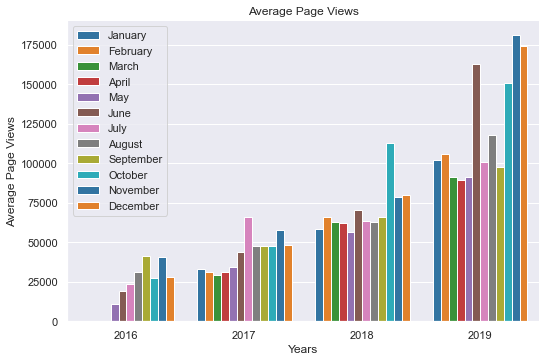

In [81]:
def draw_bar_plot():
    # draw bar plot
    df_bar = df.copy().reset_index().drop(['date'], axis = 1)
    df_bar['year'] = df.reset_index().date.dt.year
    df_bar['month'] = df.reset_index().date.dt.month_name()

    
    g = sns.catplot(x = 'year', y = 'value', data = df_bar, kind = 'bar',
                hue = 'month', aspect = 1.55, ci = None, 
                hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], legend_out = False, palette = 'tab10').set(
    title = 'Average Page Views', xlabel = 'Years', ylabel = 'Average Page Views') 
    plt.legend(loc="upper left")
    # df_groups = df_bar.groupby([df.index.year, df.index.month])["value"].mean()
    
    
draw_bar_plot()


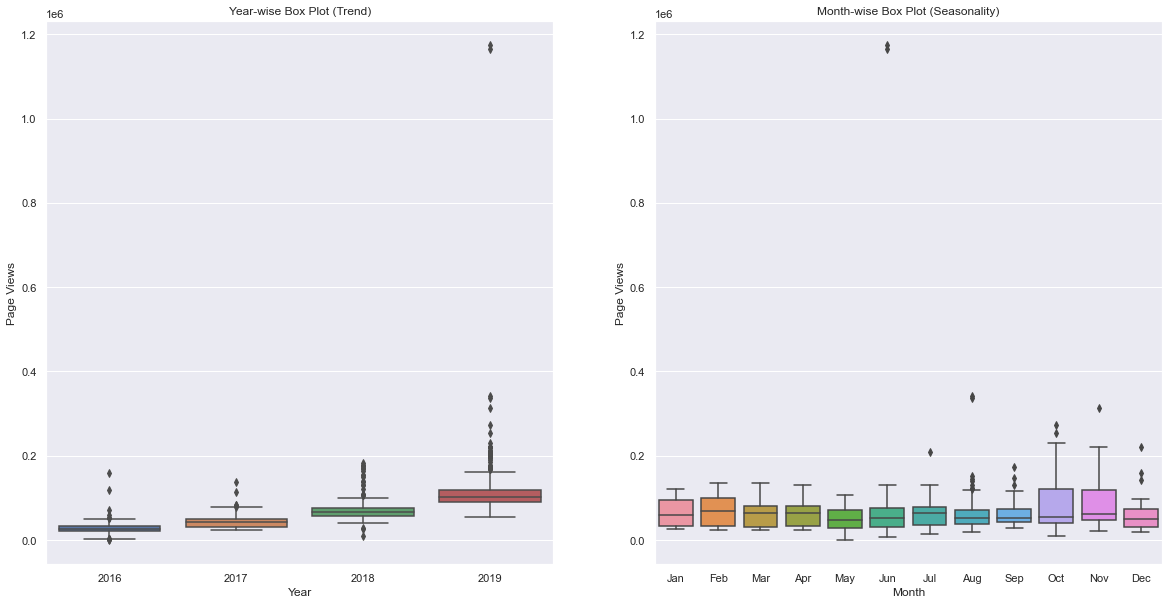

In [98]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

    sns.boxplot(data = df_box, x = 'year', y = 'value', ax = ax[0])
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_ylabel('Page Views')
    ax[0].set_xlabel('Year')

    sns.boxplot(data = df_box, x = 'month', y = 'value', order = Months, ax = ax[1])
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_ylabel('Page Views')
    ax[1].set_xlabel('Month')
    
draw_box_plot()
    